# Si111 simple

In [4]:
#
#
# This example shows the diffraction by a Si 111 crystal calculated in its simplest implementation:
#
#
#    - calculate_simple_diffraction()
#      Uses a crystal setup and calculates the complex transmitivity and reflectivity
#
#
import numpy



from crystalpy.diffraction.GeometryType import BraggDiffraction
from crystalpy.diffraction.DiffractionSetupXraylib import DiffractionSetupXraylib
from crystalpy.diffraction.Diffraction import Diffraction


from crystalpy.util.Vector import Vector
from crystalpy.util.Photon import Photon

In [2]:
def calculate_simple_diffraction(calculation_method=0):

    # Create a diffraction setup.

    print("\nCreating a diffraction setup...")
    diffraction_setup = DiffractionSetupXraylib(geometry_type          = BraggDiffraction(),  # GeometryType object
                                               crystal_name           = "Si",                             # string
                                               thickness              = 1e-2,                             # meters
                                               miller_h               = 1,                                # int
                                               miller_k               = 1,                                # int
                                               miller_l               = 1,                                # int
                                               asymmetry_angle        = 0,#10.0*numpy.pi/180.,                              # radians
                                               azimuthal_angle        = 0.0)                              # radians                            # int


    energy                 = 8000.0                           # eV
    angle_deviation_min    = -100e-6                          # radians
    angle_deviation_max    = 100e-6                           # radians
    angle_deviation_points = 500

    angle_step = (angle_deviation_max-angle_deviation_min)/angle_deviation_points

    #
    # gets Bragg angle needed to create deviation's scan
    #
    bragg_angle = diffraction_setup.angleBragg(energy)

    print("Bragg angle for E=%f eV is %f deg"%(energy,bragg_angle*180.0/numpy.pi))


    # Create a Diffraction object (the calculator)
    diffraction = Diffraction()

    # initialize arrays for storing outputs
    deviations = numpy.zeros(angle_deviation_points)
    intensityS = numpy.zeros(angle_deviation_points)
    intensityP = numpy.zeros(angle_deviation_points)

    for ia in range(angle_deviation_points):
        deviation = angle_deviation_min + ia * angle_step
        angle = deviation  + bragg_angle

        # calculate the components of the unitary vector of the incident photon scan
        # Note that diffraction plane is YZ
        yy = numpy.cos(angle)
        zz = - numpy.abs(numpy.sin(angle))
        photon = Photon(energy_in_ev=energy,direction_vector=Vector(0.0,yy,zz))

        # perform the calculation
        coeffs = diffraction.calculateDiffractedComplexAmplitudes(diffraction_setup, photon, calculation_method=calculation_method)

        # store results
        deviations[ia] = deviation
        intensityS[ia] = numpy.abs(coeffs['S']) ** 2
        intensityP[ia] = numpy.abs(coeffs['P']) ** 2

    # plot results
    import matplotlib.pylab as plt
    plt.plot(1e6*deviations,intensityS)
    plt.plot(1e6*deviations,intensityP)
    plt.xlabel("deviation angle [urad]")
    plt.ylabel("Reflectivity")
    plt.legend(["Sigma-polarization","Pi-polarization"])
    plt.show()


Creating a diffraction setup...
Bragg angle for E=8000.000000 eV is 14.308608 deg


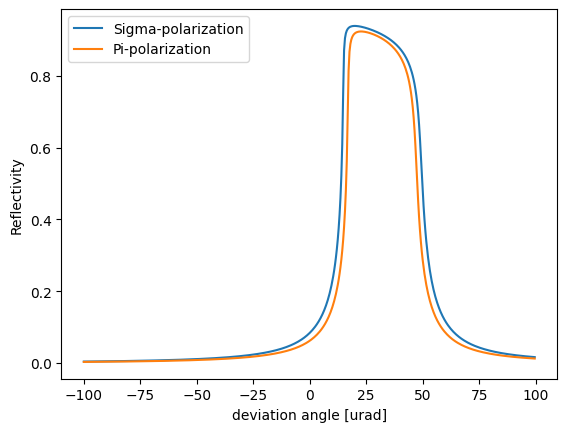

In [3]:
calculation_method = 0 # 0=Zachariasen, 1=Guigay
calculate_simple_diffraction(calculation_method=calculation_method)